# Multiple Linear Regression
## Bike-sharing Assignment

#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those variables describe the bike demands

##### Business Goal:
To develop a model for the demand for shared bikes with the available independent variables. 
It will be used by the management to understand how exactly the demands vary with different features. 
The management wants to manipulate the business strategy to meet the demand levels and the customers expectations and to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the bike sharing dataset

In [96]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [97]:
import numpy as np
import pandas as pd


In [98]:
bike = pd.read_csv("day.csv")

In [99]:
# Check the head of the dataset
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [100]:
#check the shape

bike.shape

(730, 16)

In [101]:
#check dataframe for null and datatype

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [102]:
#check the details of numerical data

bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [103]:
#check the columns of data

bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [104]:
#check the datatypes of data

bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [105]:
#check the dimensions of data

bike.ndim

2

There are 730 rows and 16 columns

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 2000x1500 with 0 Axes>

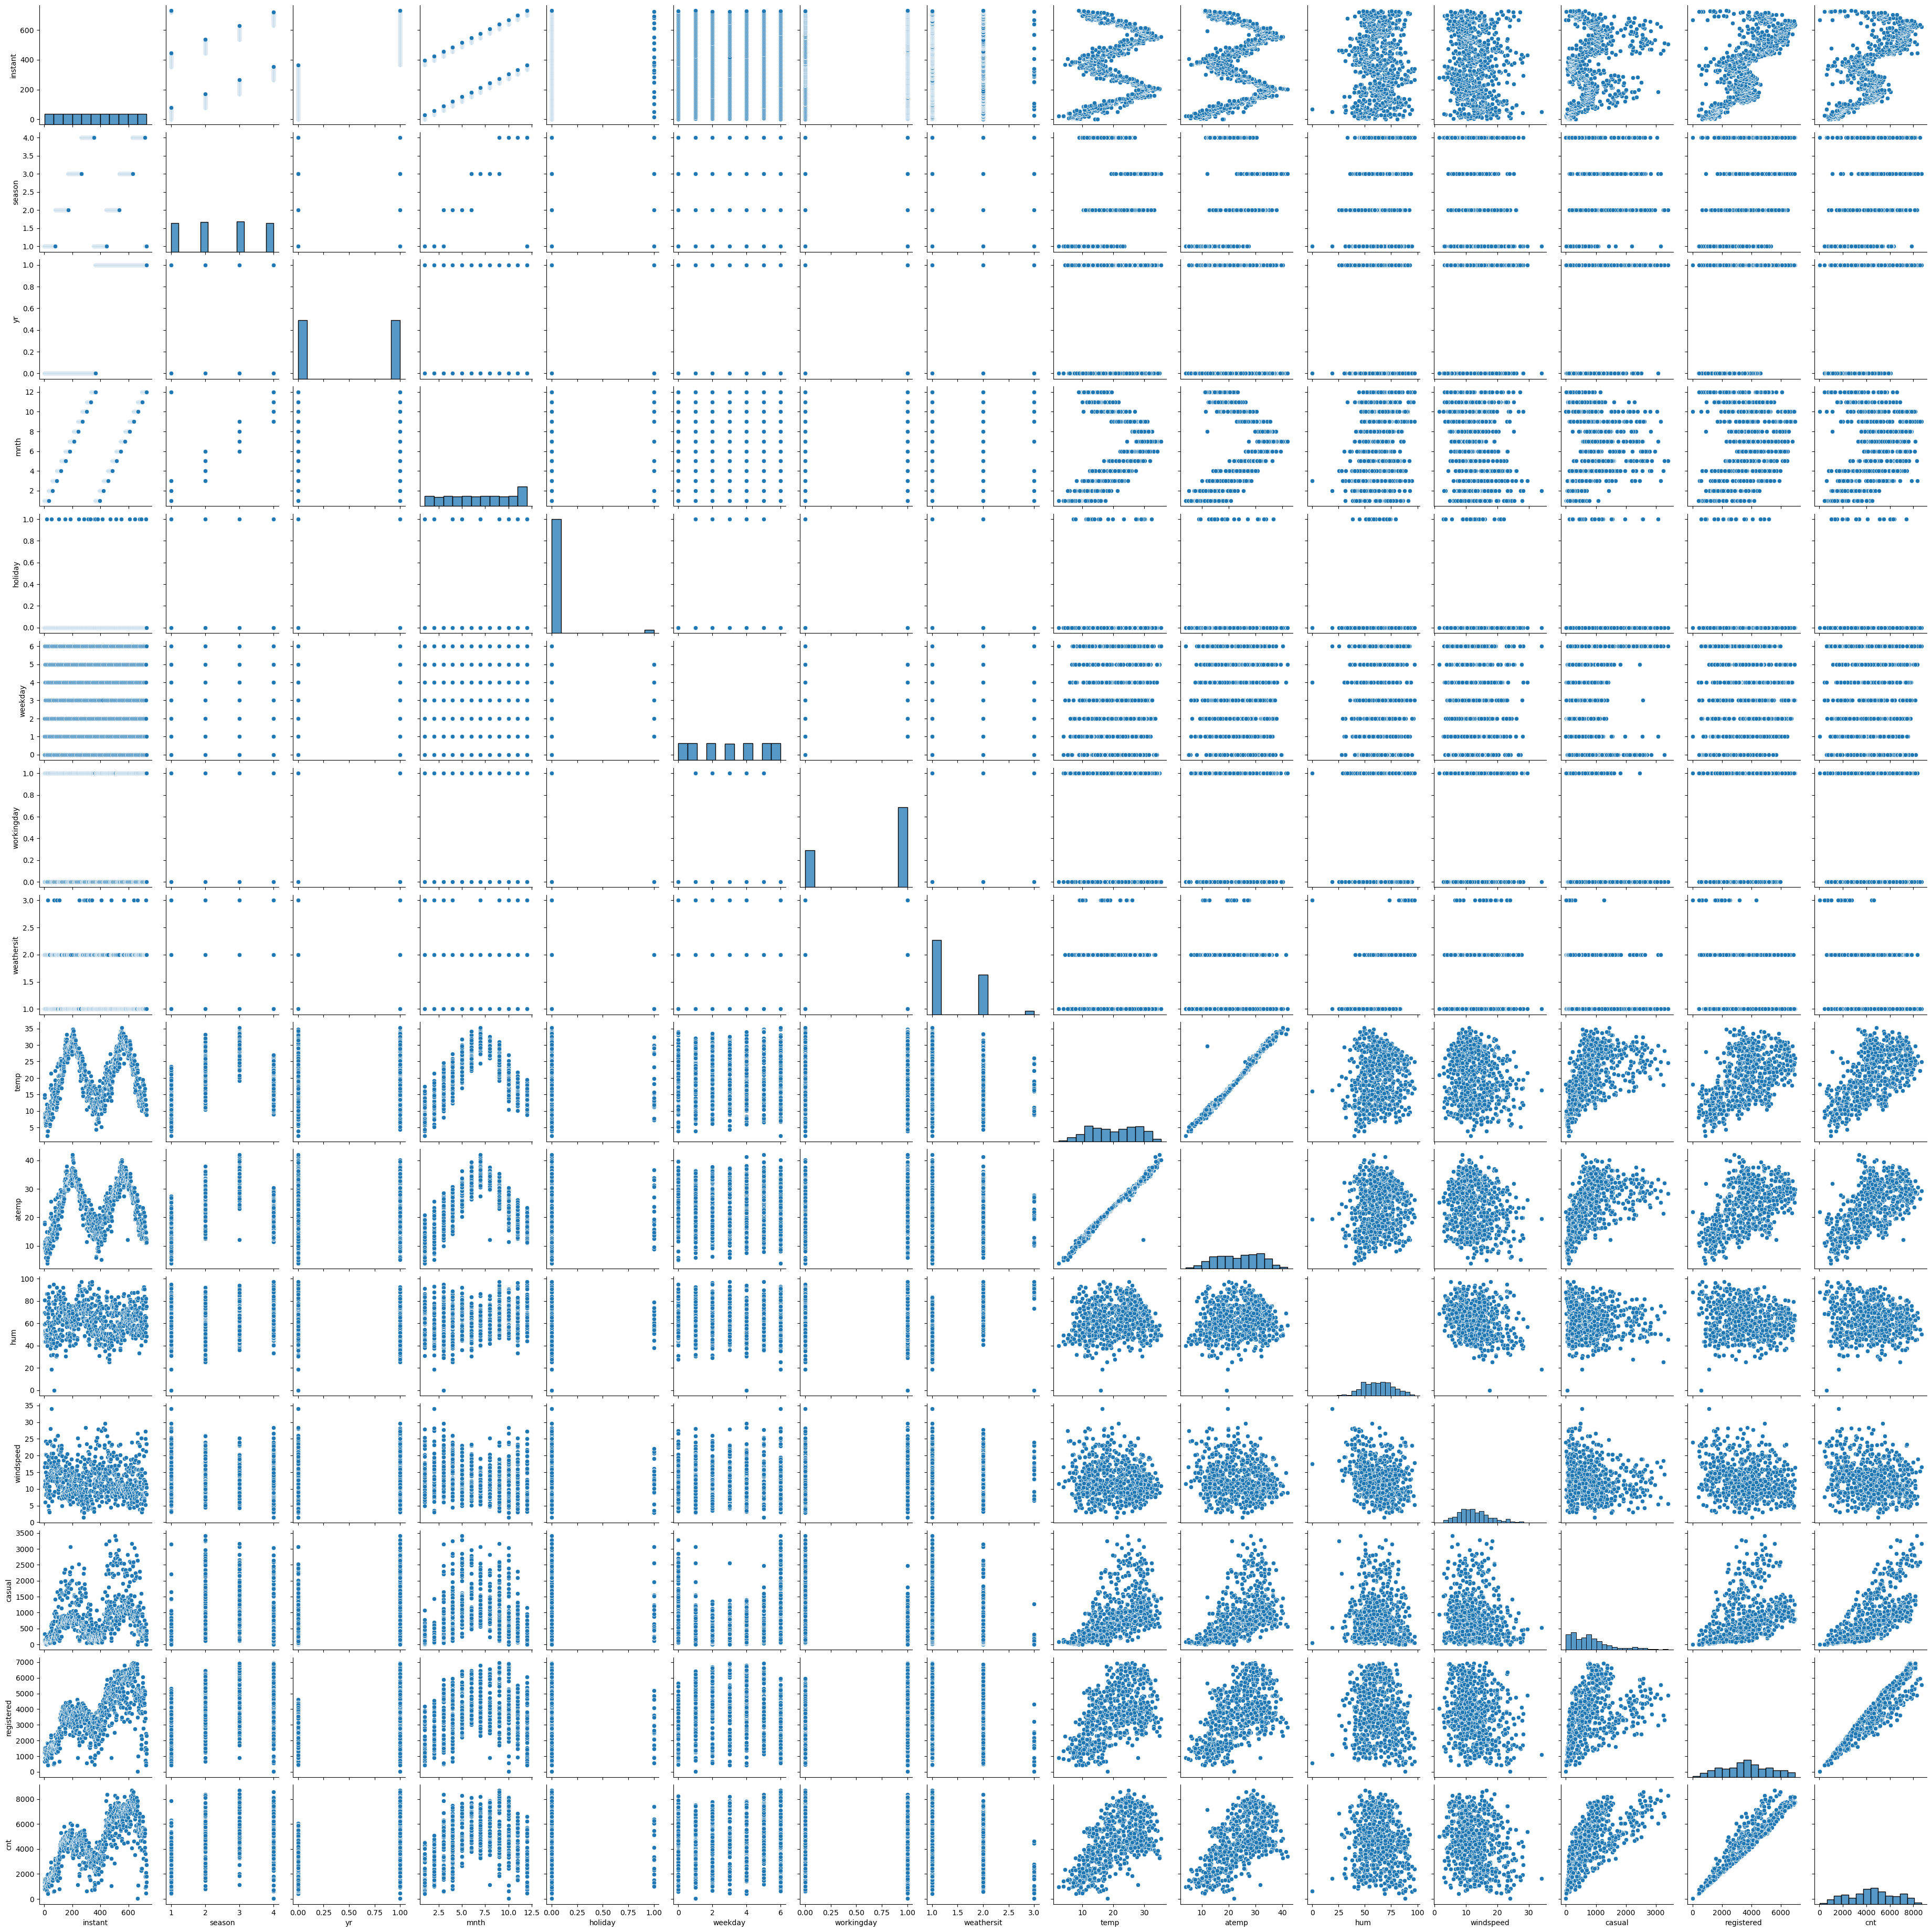

In [107]:
plt.figure(figsize=(20,15))
sns.pairplot(bike)
plt.show()

<Figure size 1500x3000 with 0 Axes>

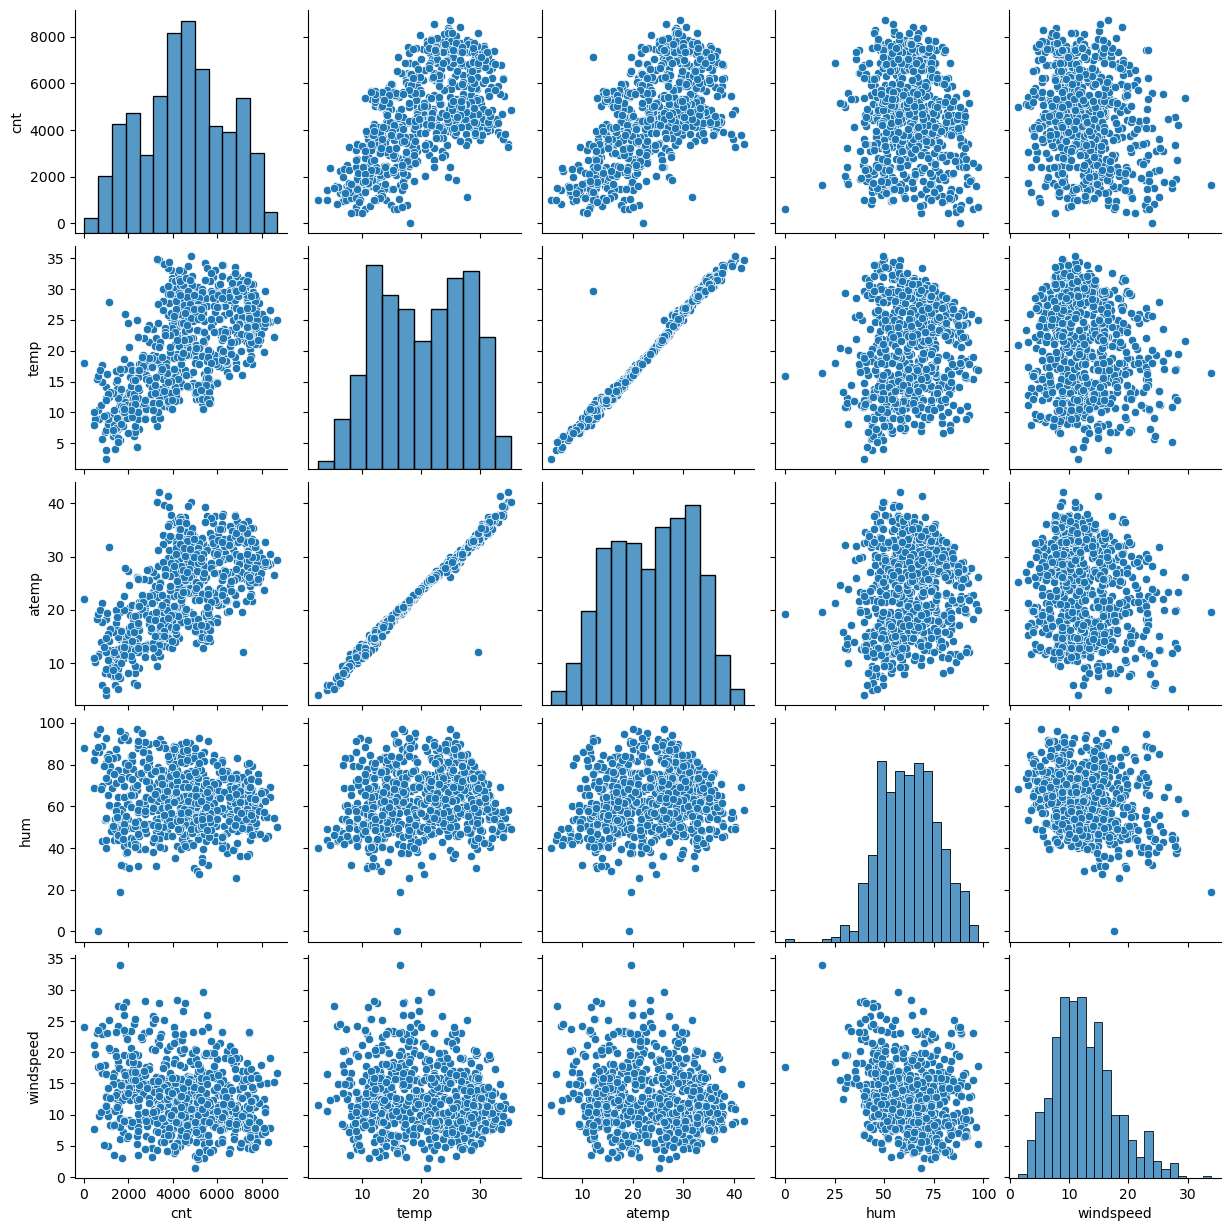

In [109]:
#Draw pairplots for continuous numeric variables
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Inference
- `temp` and `atemp` are highly co-related with each other
- `temp` and `atemp` has the highest corelation with the target variable cnt


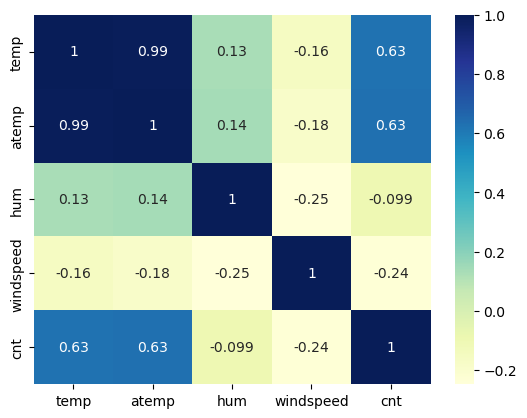

In [110]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='YlGnBu', annot = True)
plt.show()

#### Inference:
- `temp` and `atemp` are highly co-ordinated as it is 0.99 which is almost 1. Also, `atemp` seems to be derived from `temp` so will drop `temp` but later

#### Visualising Categorical Variables

As there are a few categorical variables in the dataset, let's make a boxplot for some of these variables.

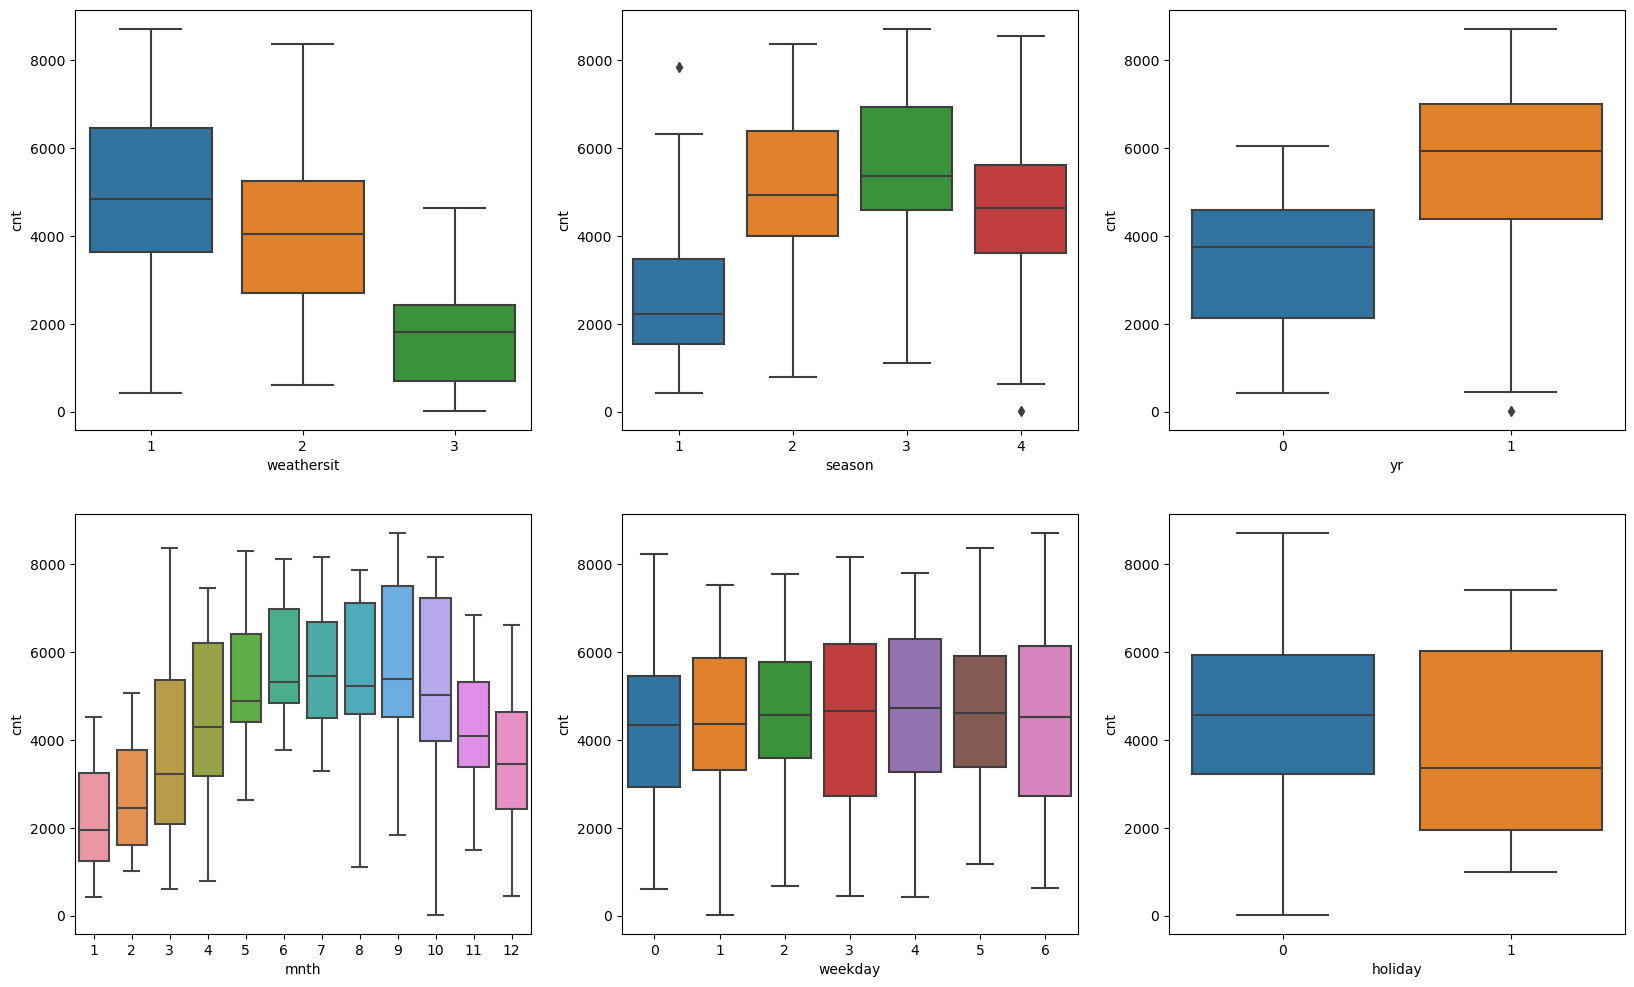

In [111]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for weekday with holiday as the hue.

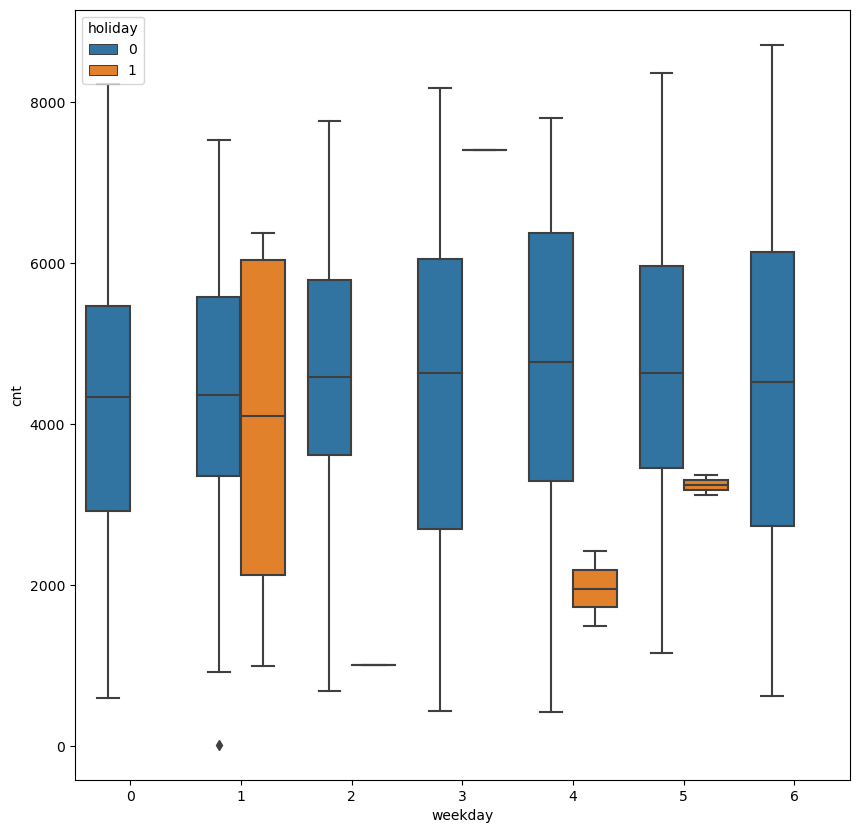

In [112]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'holiday', data = bike)
plt.show()

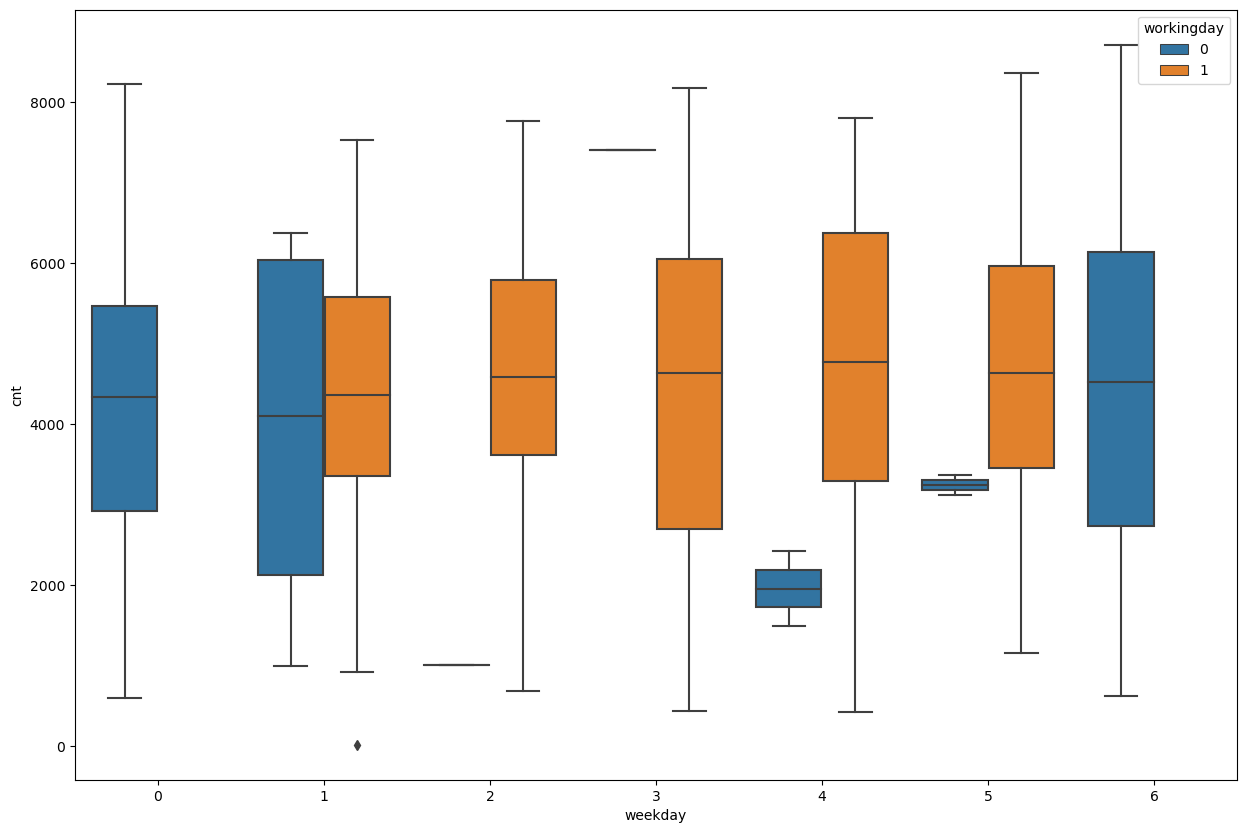

In [113]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'workingday', data = bike)
plt.show()

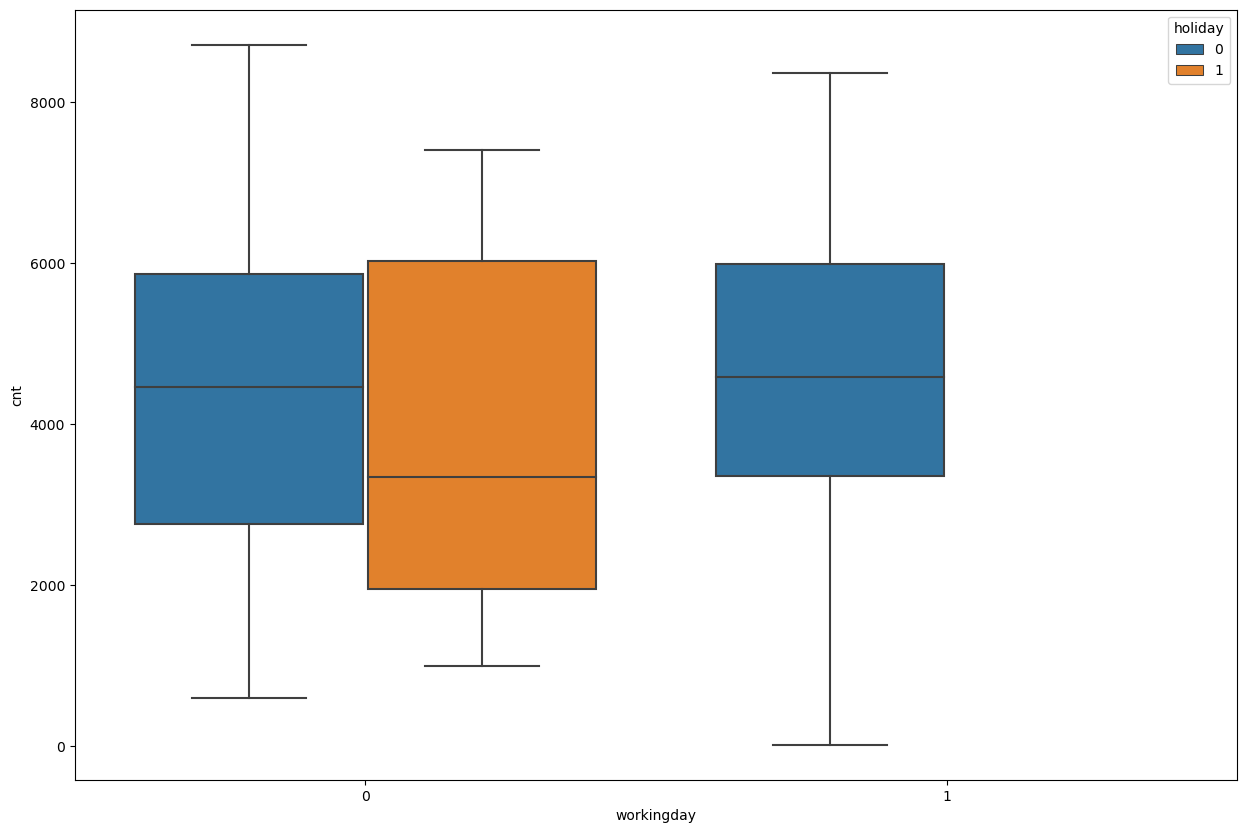

In [114]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'holiday', data = bike)
plt.show()

Interpretation of above boxplot for Workingday and Holiday:

- '01' will be Holiday
- '10' will be Working Day
- '00' will be not Holiday and not working day which is = weekend

#### Inference:
- weathersit: 1 has the highest bike demand
- season : 3 has the highest bike demand
- yr: year-on-year the demand is increasing
- mnth: Demand is continuously growing each month till 6th month (June). September month (9) has highest demand. After September, demand is gradually decreasing
- weekday: 3 and 4 has relatively higher demand than other days but it is not clearly giving demand
- holiday: demand has decreased on a holiday

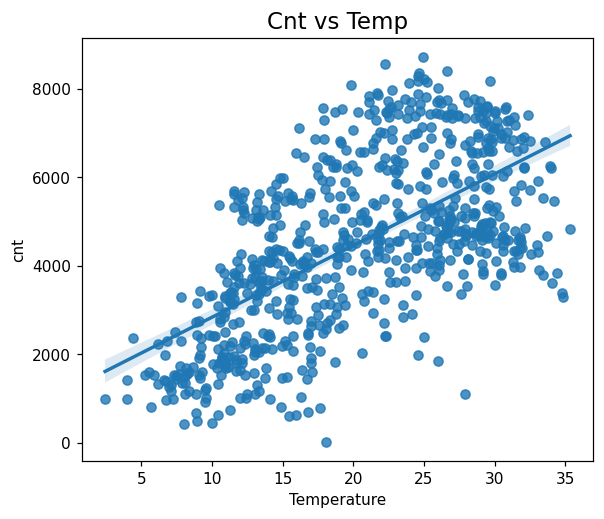

In [125]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=15)
sns.regplot(data=bike,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

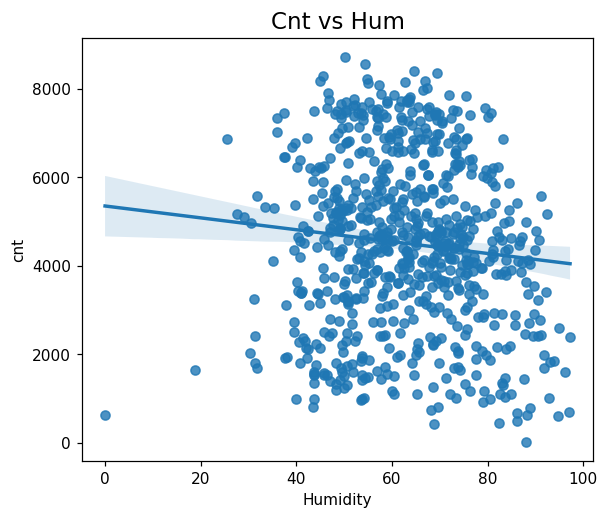

In [126]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=15)
sns.regplot(data=bike,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

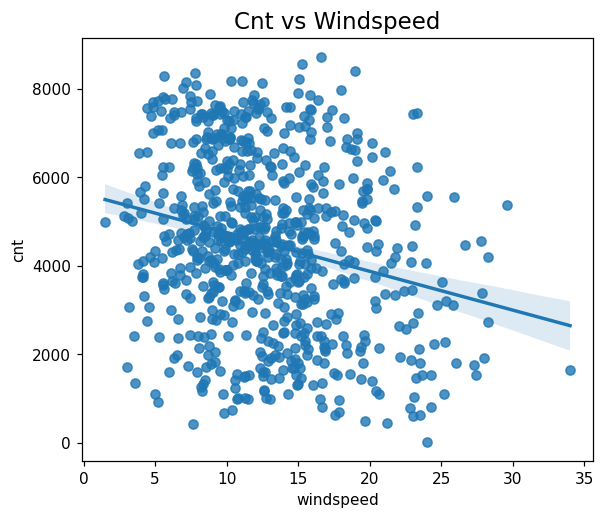

In [127]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=15)
sns.regplot(data=bike,y="cnt",x="windspeed")
plt.show()

#### Inference:
- temp: Demand for bikes is positively corelated to `temp`. `cnt` is linearly increasing with `temp` indicating linear relation.
- hum: Demand for bikes is negatively corelated to `hum`. `cnt` is decreasing with increasing `hum` and the values are more scattered.
- windspeed: Demand for bikes is negatively corelated to `windspeed`. `cnt` is decreasing with increasing `windspeed` and the values are more scattered.
- 

## Step 3: Data Preparation

In [115]:
# Check the bike dataframe now

bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### Drop columns that are not useful for analysis

- Sum of `casual` and `registered` variables describe the target variable `cnt`, which leads to data leakage

In [116]:
#Before dropping dtedate, let us introduce a days_old variable which indicates how old is the business
bike['days_old'] = (pd.to_datetime(bike['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days


In [117]:
# Drop `dteday' column as we already have month and weekday columns to work with

bike.drop(['dteday'], axis = 1, inplace = True)

In [118]:
# Drop `instant` column as it is index column which has nothing to do with target

bike.drop(['instant'], axis = 1, inplace = True)

In [119]:
# Drop `casual` and `registered` columns  as we have cnt column which is sum of the both and is the target column

bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

In [120]:
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  days_old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

In [121]:
bike.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [122]:
bike.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [123]:
bike.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   
days_old    4.135867e-01  8.660262e-01  4.982507e-01  0.016275 -0.000023   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013762    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.002945   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.004688    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.035800    0.031112 -0.000168 -0.007539 -0.052290   0.014283   
workingday    1.000000    0.060236  0.053470  0.052940  0.023202  -0.018666   
weathersit    0.060236    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.053470   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.052940   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.023202    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.018666    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt           0.062542   -0.295929  0.627044  0.630685 -0.098543  -0.235132   
days_old     -0.004619   -0.021862  0.150738  0.152773  0.016080  -0.112667   

                 cnt  days_old  
season      0.404584  0.413587  
yr          0.569728  0.866026  
mnth        0.278191  0.498251  
holiday    -0.068764  0.016275  
weekday     0.067534 -0.000023  
workingday  0.062542 -0.004619  
weathersit -0.295929 -0.021862  
temp        0.627044  0.150738  
atemp       0.630685  0.152773  
hum        -0.098543  0.016080  
windspeed  -0.235132 -0.112667  
cnt         1.000000  0.629896  
days_old    0.629896  1.000000

#### `season` `weathersit` `mnth` `weekday` should be non-numeric but are integers

## EDA

In [124]:
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0   moderate  14.110847   
1  spring   0  jan        0     sun           0   moderate  14.902598   
2  spring   0  jan        0     mon           1       good   8.050924   
3  spring   0  jan        0     tue           1       good   8.200000   
4  spring   0  jan        0     wed           1       good   9.305237   

      atemp      hum  windspeed   cnt  days_old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

In [128]:
bike.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.465405    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt    days_old  
count  730.000000   730.000000  730.000000  
mean    12.763620  4508.006849  364.500000  
std      5.195841  1936.011647  210.877136  
min      1.500244    22.000000    0.000000  
25%      9.041650  3169.750000  182.250000  
50%     12.125325  4548.500000  364.500000  
75%     15.625589  5966.000000  546.750000  
max     34.000021  8714.000000  729.000000

In [129]:
bike.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0   moderate  14.110847   
1  spring   0  jan        0     sun           0   moderate  14.902598   
2  spring   0  jan        0     mon           1       good   8.050924   
3  spring   0  jan        0     tue           1       good   8.200000   
4  spring   0  jan        0     wed           1       good   9.305237   

      atemp      hum  windspeed   cnt  days_old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

In [130]:
#Print columns before creating dummies
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

#### Create dummy variables for all categorical variables

In [131]:
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True,dtype=int)
bike = pd.get_dummies(data=bike,columns=["weathersit"],dtype=int)

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose severe weather situation.

In [132]:
#Print columns after creating dummies
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [133]:
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   days_old  season_spring  ...  mnth_sept  weekday_mon  weekday_sat  \
0         0              1  ...          0            0            1   
1         1              1  ...          0            0            0   
2         2              1  ...          0            1            0   
3         3              1  ...          0            0            0   
4         4              1  ...          0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0            0            0            0            0               0   
1            1            0            0            0               0   
2            0            0            0            0               0   
3            0            0            1            0               0   
4            0            0            0            1               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 32 columns]

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [134]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [135]:
# Checking shape and size for train and test
print(df_train.shape)
print(df_test.shape)

(510, 32)
(219, 32)


### Rescaling the Features 

scaling doesnot impact the model. 
So it is extremely important to rescale the variables so that they have a comparable scale. 
We will use MinMax scaling.

In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:
scaler = MinMaxScaler()

In [138]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [139]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  days_old  season_spring  ...  mnth_sept  weekday_mon  \
653  0.864243       653              0  ...          0            0   
576  0.827658       576              0  ...          0            0   
426  0.465255       426              1  ...          0            0   
728  0.204096       728              1  ...          0            0   
482  0.482973       482              0  ...          0            0   

     weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
653            0            0            0            1            0   
576            0            0            0            1            0   
426            1            0            0            0            0   
728            0            1            0            0            0   
482            1            0            0            0            0   

     weathersit_bad  weathersit_good  weathersit_moderate  
653               0                1                    0  
576               0                1                    0  
426               0                0                    1  
728               0                1                    0  
482               0                0                    1  

[5 rows x 32 columns]

In [140]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt    days_old  season_spring  ...   mnth_sept  \
count  510.000000  510.000000  510.000000     510.000000  ...  510.000000   
mean     0.320768    0.513620  367.941176       0.243137  ...    0.080392   
std      0.169797    0.224593  209.868619       0.429398  ...    0.272166   
min      0.000000    0.000000    0.000000       0.000000  ...    0.000000   
25%      0.199179    0.356420  186.250000       0.000000  ...    0.000000   
50%      0.296763    0.518638  372.000000       0.000000  ...    0.000000   
75%      0.414447    0.684710  552.750000       0.000000  ...    0.000000   
max      1.000000    1.000000  728.000000       1.000000  ...    1.000000   

       weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
count   510.000000   510.000000   510.000000   510.000000   510.000000   
mean      0.150980     0.154902     0.143137     0.133333     0.131373   
std       0.358381     0.362166     0.350557     0.340268     0.338139   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_wed  weathersit_bad  weathersit_good  weathersit_moderate  
count   510.000000      510.000000       510.000000           510.000000  
mean      0.158824        0.029412         0.627451             0.343137  
std       0.365870        0.169124         0.483958             0.475223  
min       0.000000        0.000000         0.000000             0.000000  
25%       0.000000        0.000000         0.000000             0.000000  
50%       0.000000        0.000000         1.000000             0.000000  
75%       0.000000        0.000000         1.000000             1.000000  
max       1.000000        1.000000         1.000000             1.000000  

[8 rows x 32 columns]

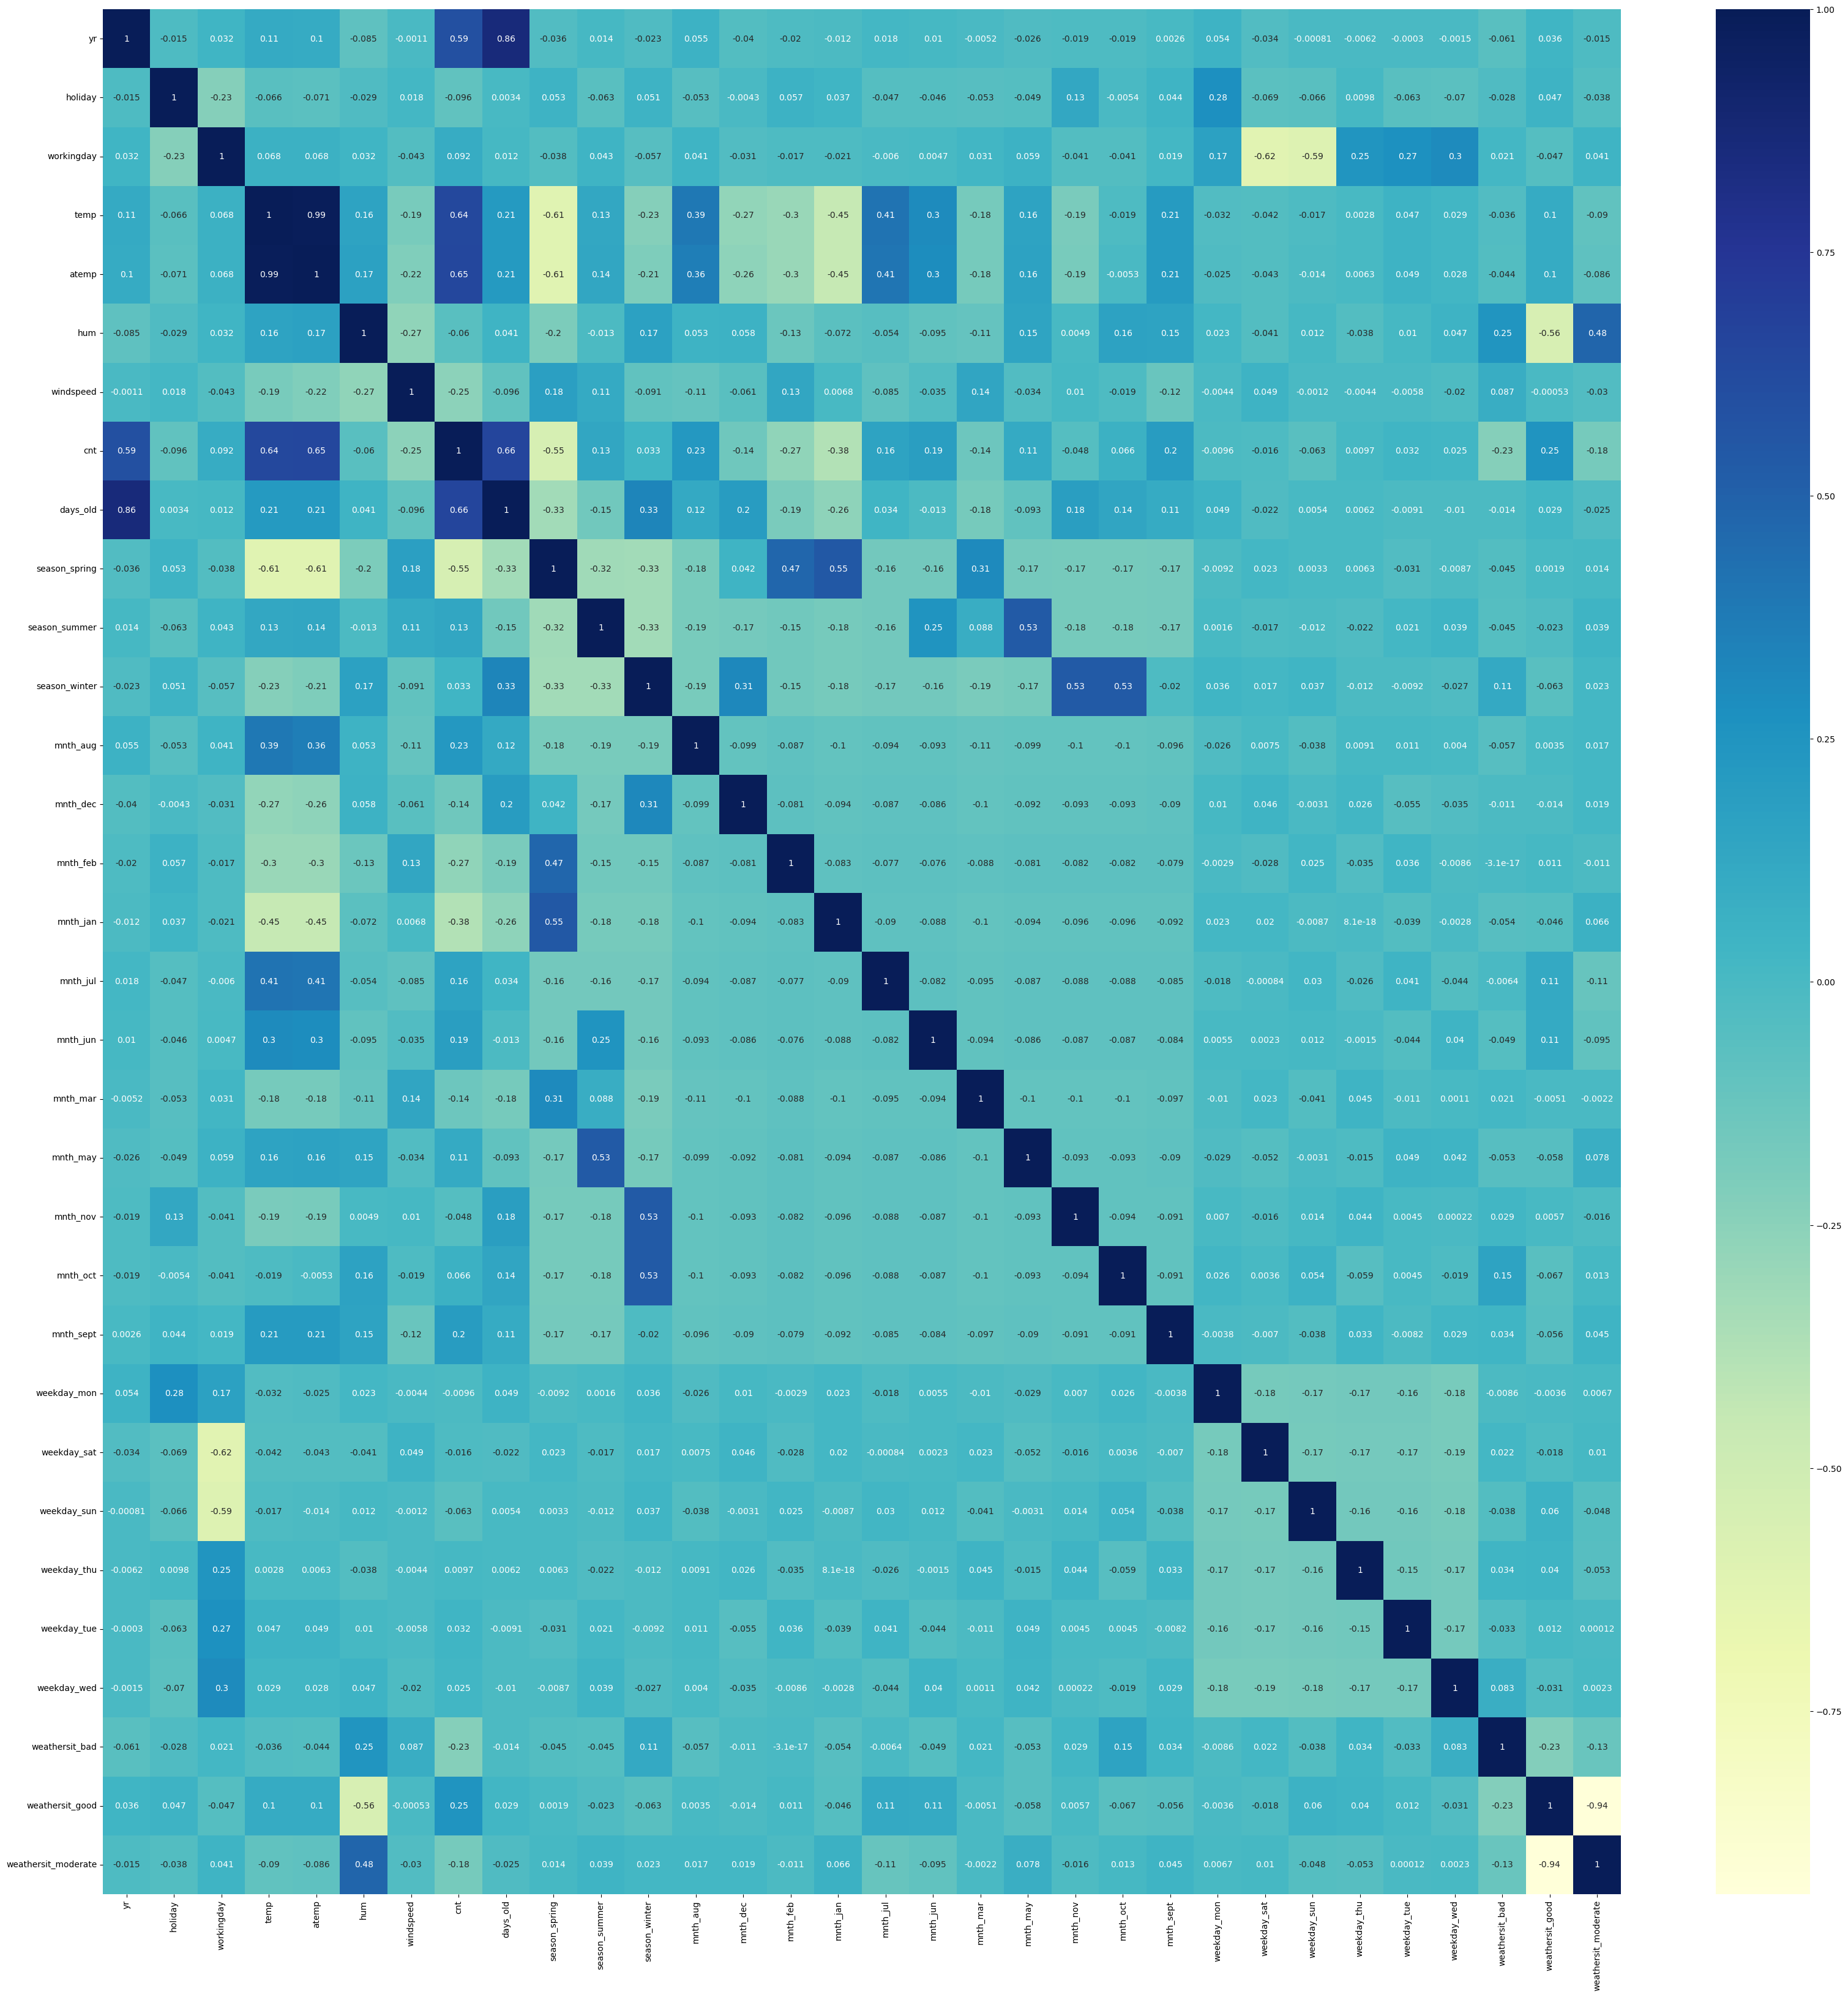

In [145]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

It is observed that cnt is most correlated to atemp, temp and then yr mostly. 
Lets see a pairplot for atemp vs cnt.

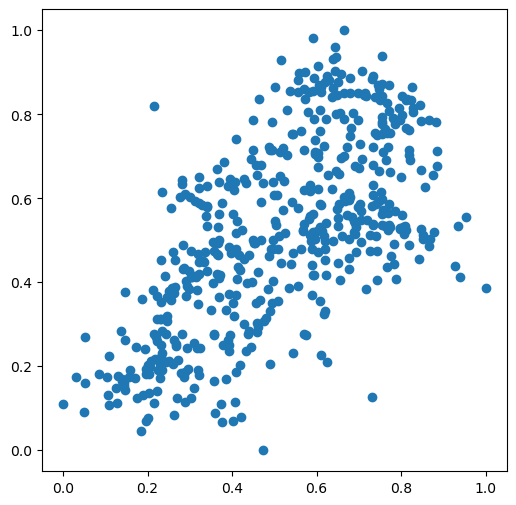

In [146]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

So, we pick atemp as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [147]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. 
Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [148]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [149]:
# Check the parameters obtained

lr.params

const    0.162924
atemp    0.683633
dtype: float64

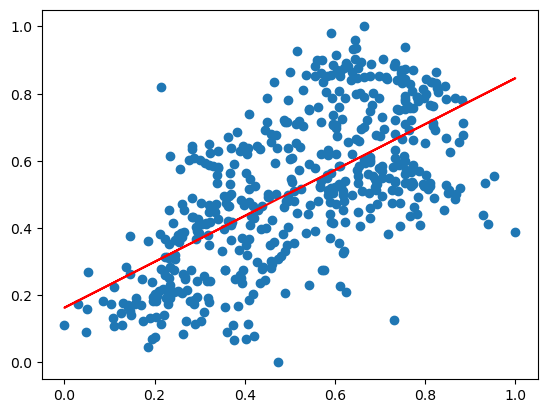

In [150]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.683*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [151]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           1.10e-61
Time:                        22:22:36   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

The R-squared value obtained is `0.418`. Since we have so many variables, we can clearly do better than this. So lets go ahead  and add all the feature variables.

### Adding all the variables to the model

In [154]:
# Check all the columns of the dataframe

bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [155]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

lr_1.params

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     96.33
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          8.09e-180
Time:                        22:35:57   Log-Likelihood:                 528.08
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     480   BIC:                            -869.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1356    

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [156]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [157]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
30  weathersit_moderate     inf
1               holiday     inf
2            workingday     inf
29      weathersit_good     inf
28       weathersit_bad     inf
24          weekday_sun     inf
23          weekday_sat     inf
7              days_old  576.76
0                    yr  438.59
12             mnth_dec   67.81
3                  temp   67.22
19             mnth_nov   56.60
4                 atemp   56.23
20             mnth_oct   44.06
21            mnth_sept   27.87
11             mnth_aug   24.01
14             mnth_jan   13.67
15             mnth_jul   13.65
8         season_spring   10.84
10        season_winter    9.56
9         season_summer    8.31
13             mnth_feb    6.96
16             mnth_jun    6.43
17             mnth_mar    4.41
18             mnth_may    3.11
5                   hum    2.06
22          weekday_mon    1.98
27          weekday_wed    1.94
25          weekday_thu    1.83
26          weekday_tue    1.80
6             windspeed    1.30

Function to build a model using statsmodel api

In [163]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_lm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_lm).fit()
    print(lm.summary())
    return lm

Function to calculate VIFs and print them

In [164]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))
    

In [165]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [166]:
#Selected 15 columns for Model 1
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          2.31e-191
Time:                        23:00:46   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2510    

Not selected 16 variables based on high p-values and VIF:
['atemp', 'days_old', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',       'weekday_mon', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_good']

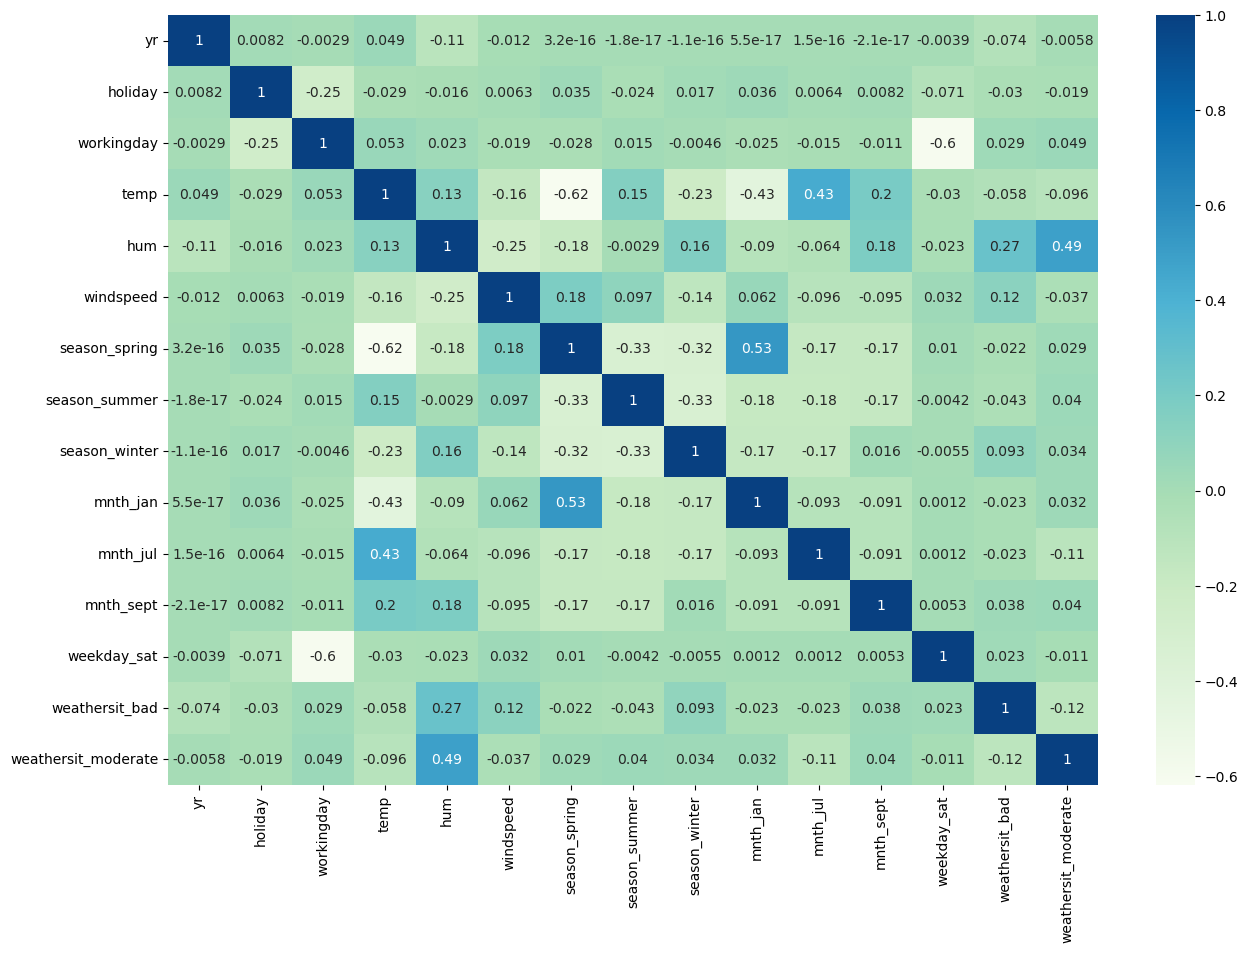

In [167]:
# Checking correlation of features selected for Model 1. 
# Also to check impact of different features on output.
plt.figure(figsize = (15,10))
sns.heatmap(bike[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

Based on the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `mnth_jan` as it has a very high p-value of `0.048`. Lets go ahead and drop this variable

In [177]:
#Selected columns for Model 2
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          1.13e-191
Time:                        23:39:56   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2394    

In [169]:
#Selected columns for Model 3
# Dropping the variable `hum` as it has negative coefficient and is insignificant as it has high VIF
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          5.73e-189
Time:                        23:17:28   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1577    

In [170]:
#Selected columns for Model 4
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value of 0.038
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          3.28e-189
Time:                        23:20:30   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1493    

In [171]:
#Selected columns for Model 5
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value 0.008
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          6.86e-189
Time:                        23:22:29   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1405    

In [173]:
#Selected columns for Model 6
# Dropping the variable season_summer as all p-values are good and VIF is slightly higher than 5.0. Summers are usually high in temp
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          4.83e-186
Time:                        23:30:34   Log-Likelihood:                 493.23
No. Observations:                 510   AIC:                            -964.5
Df Residuals:                     499   BIC:                            -917.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2174    

In [178]:
#Selected columns for Model 7
# Dropping the variable workingday as all p-values are zeroes and VIF is slightly higher than 5.0. 
cols = ['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     259.6
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          4.05e-182
Time:                        23:53:11   Log-Likelihood:                 481.09
No. Observations:                 510   AIC:                            -942.2
Df Residuals:                     500   BIC:                            -899.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2621    

In [183]:
#Selected columns for Model 8
# Dropping the variable windspeed and adding back workingday as all p-values are zeroes and VIF is slightly higher than 5.0. 
cols = ['yr', 'workingday', 'temp', 'season_spring', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.4
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          4.93e-181
Time:                        00:15:23   Log-Likelihood:                 478.53
No. Observations:                 510   AIC:                            -937.1
Df Residuals:                     500   BIC:                            -894.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1592    

In [195]:
# Let us use Model 8 as our final model as VIF < 5.0, p values are zeroes and R2 = 0.822, Adj R2 = 0.819 which is very close to R2
from sklearn.linear_model import LinearRegression

def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

# Let us build the finalmodel using sklearn
cols = ['yr', 'workingday', 'temp', 'season_spring', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

#Build a model with above columns
lr_3 = build_model_sk(X_train[cols],y_train)


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [196]:
y_train_cnt = lr_3.predict(X_train[cols])

Text(0.5, 0, 'Errors')

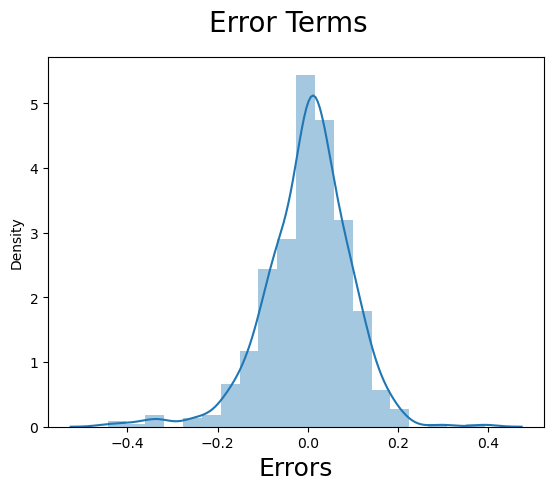

In [197]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Errors are normally distributed with mean 0.0 . This seems to be good.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [198]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [199]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.459904    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt    days_old  season_spring  ...   mnth_sept  \
count  219.000000  219.000000  219.000000     219.000000  ...  219.000000   
mean     0.313350    0.520592  355.776256       0.255708  ...    0.086758   
std      0.159947    0.218435  213.665198       0.437258  ...    0.282125   
min     -0.042808    0.048205    3.000000       0.000000  ...    0.000000   
25%      0.198517    0.377531  170.000000       0.000000  ...    0.000000   
50%      0.299459    0.524275  348.000000       0.000000  ...    0.000000   
75%      0.403048    0.672745  536.500000       1.000000  ...    0.000000   
max      0.807474    0.963300  729.000000       1.000000  ...    1.000000   

       weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
count   219.000000   219.000000   219.000000   219.000000   219.000000   
mean      0.127854     0.118721     0.146119     0.164384     0.164384   
std       0.334692     0.324202     0.354034     0.371472     0.371472   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_wed  weathersit_bad  weathersit_good  weathersit_moderate  
count   219.000000      219.000000       219.000000           219.000000  
mean      0.100457        0.027397         0.652968             0.319635  
std       0.301297        0.163612         0.477117             0.467403  
min       0.000000        0.000000         0.000000             0.000000  
25%       0.000000        0.000000         0.000000             0.000000  
50%       0.000000        0.000000         1.000000             0.000000  
75%       0.000000        0.000000         1.000000             1.000000  
max       1.000000        1.000000         1.000000             1.000000  

[8 rows x 32 columns]

#### Dividing into X_test and y_test

In [200]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

In [203]:
X_test_m3.head()

const  yr  holiday  workingday      temp     atemp       hum  windspeed  \
184    1.0   0        1           0  0.831783  0.769660  0.657364   0.084219   
535    1.0   1        0           1  0.901354  0.842587  0.610133   0.153728   
299    1.0   0        0           1  0.511964  0.496145  0.837699   0.334206   
221    1.0   0        0           1  0.881625  0.795343  0.437098   0.339570   
152    1.0   0        0           1  0.817246  0.741471  0.314298   0.537414   

     days_old  season_spring  ...  mnth_sept  weekday_mon  weekday_sat  \
184       184              0  ...          0            1            0   
535       535              0  ...          0            0            0   
299       299              0  ...          0            0            0   
221       221              0  ...          0            0            0   
152       152              0  ...          0            0            0   

     weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
184            0            0            0            0               0   
535            0            0            0            1               0   
299            0            1            0            0               0   
221            0            0            0            1               0   
152            0            1            0            0               0   

     weathersit_good  weathersit_moderate  
184                0                    1  
535                1                    0  
299                0                    1  
221                1                    0  
152                1                    0  

[5 rows x 32 columns]

In [204]:
# Creating X_test_m3 dataframe by using final model variables

cols = ['yr', 'workingday', 'temp', 'season_spring', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

X_test_m3 = X_test_m3[cols]

In [205]:
X_test_m3.head()

yr  workingday      temp  season_spring  season_winter  mnth_sept  \
184   0           0  0.831783              0              0          0   
535   1           1  0.901354              0              0          0   
299   0           1  0.511964              0              1          0   
221   0           1  0.881625              0              0          0   
152   0           1  0.817246              0              0          0   

     weekday_sat  weathersit_bad  weathersit_moderate  
184            0               0                    1  
535            0               0                    0  
299            0               0                    1  
221            0               0                    0  
152            0               0                    0

In [206]:
# Making predictions using the fourth model

y_pred_m3 = lr_3.predict(X_test_m3)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

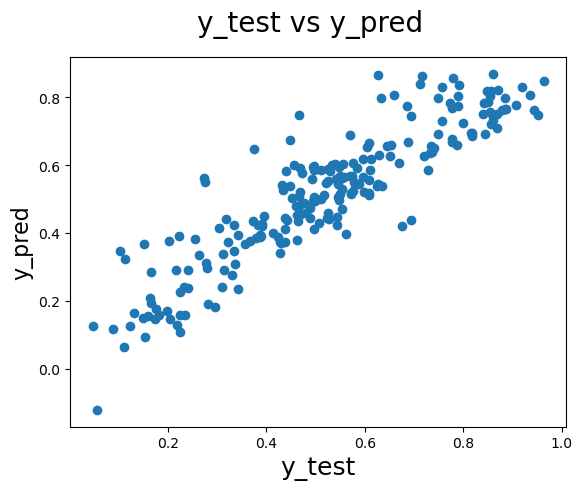

In [207]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ cnt = 0.2345 \times yr + 0.0567 \times workingday + 0.4305 \times temp - 0.1164 \times season_spring + 0.0571 \times season_winter + 0.0732 \times mnth_sept + 0.0642 \times weekday_sat - 0.3061 \times weathersit_bad - 0.0788 \times weathersit_moderate

It is observed that the error terms does not vary much as the predictor variable changes.

Overall we have a decent model, but we also acknowledge that we could do better

In [208]:
from sklearn.metrics import r2_score

In [209]:
r2_score(y_test, y_pred_m3)

0.810464799808571

####  R-squared score is 0.8104

## Interpretation of Final model:

Management should build the strategy by focusing on the below parameters to increase the bike demand.

1. Spring season has the growing bike demand.
2. September month has the highest bike demand.
3. Based on 2019 data, demand for shared bikes increased when compared to its previous year. So, when the covid situation improves, there will be more demand for shared bikes.
4. On weekend (saturday), there is good bike demand
5. When the temperature raises, there is a growing bike demand.

# Conclusion:
Company should focus on the below variables for predicting the bike sharing demand.

1. Season (Spring)
2. Months (June, September)
3. Weekday (Saturday)
4. temp
5. Weather situation (Mist+Cloudy, Light Snow)